In [11]:
import numpy as np
import matplotlib.pyplot as plt

import random

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY DO

In [12]:
#Load preprocess data
DO = np.array(pd.read_csv ('../data/processed_data/DOcsv_process.csv'))
y = np.array(DO[:,-1],dtype=int)
DO = DO[:,0:-1]

In [13]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO,y)

In [14]:
print(DO.shape, len(pred))
acc = model.score_
print(acc)

(112, 4021) 112
0.98


In [15]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.875, 0.9997304582210242, 0.98, 0.9981162540365985, 0.02, 0.125)


In [23]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIM)

[  34   93  145  230  364  385  638  639  717  921 1130 1226 1247 1272
 1445 1576 1749 1892 2027 2042 2222 2490 2607 2707 2712 2843 3214 3633
 3811 3840 4004] 1.0


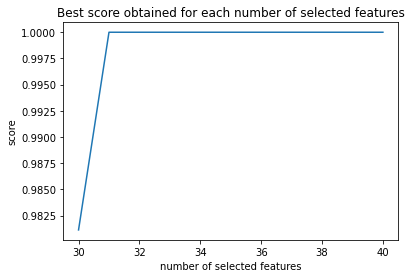

In [63]:
N = np.arange(30,41,1)
#N = np.array([40,50,60,70,80])
best_subset, best_score = MIR(y, DO, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [65]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

31
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9642857142857143, 1.0, 1.0, 0.9993939393939394, 0.0, 0.03571428571428571)


# Mutual information feature selection (MIFS)


[  19   36   62   66   68   69   91   92   99  118  130  155  156  165
  168  172  174  192  218  225  241  242  265  267  268  292  295  309
  328  348  353  369  381  405  410  427  439  440  449  452  457  463
  483  491  498  503  537  557  566  581  589  595  603  604  609  616
  640  641  642  646  651  670  672  673  692  695  721  738  745  750
  755  758  768  774  779  786  799  841  854  860  865  870  895  900
  906  913  917  918  924  925  932  971  985  994 1027 1039 1049 1065
 1074 1077 1106 1128 1131 1133 1136 1137 1163 1165 1171 1178 1180 1193
 1211 1213 1231 1264 1273 1285 1309 1312 1347 1355 1360 1398 1437 1443
 1470 1487 1527 1548 1564 1602 1607 1617 1619 1631 1638 1653 1669 1684
 1686 1687 1707 1717 1727 1733 1747 1753 1778 1781 1784 1813 1818 1819
 1823 1841 1847 1854 1866 1879 1921 1922 1937 1942 1945 1949 1951 1955
 1959 1963 1983 1991 1999 2010 2038 2057 2060 2069 2070 2072 2090 2091
 2092 2093 2096 2103 2108 2110 2115 2121 2137 2141 2152 2165 2173 2197
 2202 

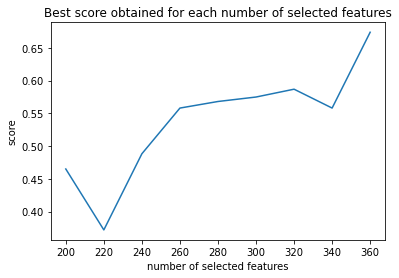

In [45]:
#N = np.array([50,80,100,125,150,200,250,300,350])
N = np.array([200,220,240,260,280,300,320,340,360])
best_subset, best_score = MIFS(y, DO, FamiliesClusters, compute_precision,True,N, 0.1, plot=True)
print(best_subset, best_score)

In [46]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

360
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5636363636363636, 0.9963334148130042, 0.6739130434782609, 0.9941463414634146, 0.32608695652173914, 0.43636363636363634)


# Joint Mutual Information (JMI)

[   1    3    4    5    6    7    8    9   10   16   20   23   38   39
   40   41   44   48   50   51   53   55   59   63   65   79   81   85
   89  113  116  119  121  123  125  131  135  145  148  160  162  170
  171  175  180  190  202  209  210  211  214  226  230  232  233  239
  243  244  252  260  269  274  286  287  290  298  301  302  303  305
  334  338  344  345  350  365  373  376  383  393  401  417  419  420
  425  432  441  454  459  460  462  469  477  488  492  494  499  500
  501  504  507  512  514  516  519  522  526  530  538  544  548  549
  551  552  556  563  572  575  585  587  591  592  597  598  611  612
  626  630  636  653  659  660  661  667  674  691  704  706  708  711
  722  724  725  736  746  749  752  757  759  765  766  773  780  785
  789  791  792  794  802  805  820  828  830  832  838  840  842  844
  847  848  853  866  885  890  892  894  908  926  938  942  943  947
  954  972  974  975  976  979  983  995  997 1003 1036 1037 1041 1045
 1046 

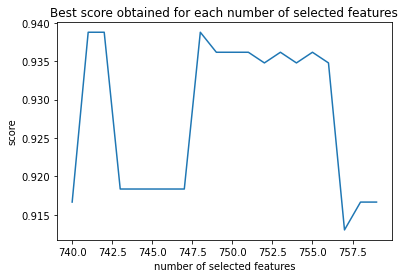

In [40]:
N = np.arange(740,760,1)
best_subset, best_score = JMI(y, DO, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [41]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

741
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8214285714285714, 0.9992121848739496, 0.9387755102040817, 0.9973787680209698, 0.061224489795918366, 0.17857142857142858)


# Double input symmetrical relevance (DISR)

[   4  289  303  575  585  591  592  598  612  636  653  659  660  661
  667  704  706  708  711  724  725  749  757  759  765  773  785  791
  794  805  820  828  838  840  842  853  866  890  926  943  975  979
  983  995  997 1036 1041 1045 1046 1048 1066 1072 1089 1122 1140 1150
 1162 1173 1177 1184 1192 1208 1212 1218 1219 1233 1243 1244 1269 1272
 1278 1294 1308 1313 1329 1335 1336 1338 1340 1346 1370 1376 1384 1394
 1396 1397 1407 1413 1419 1420 1454 1464 1481 1488 1490 1496 1498 1502
 1508 1515 1524 1529 1530 1532 1536 1544 1551 1559 1563 1570 1571 1587
 1593 1597 1603 1608 1611 1614 1616 1618 1624 1625 1626 1634 1643 1650
 1656 1667 1668 1672 1677 1682 1688 1696 1701 1703 1713 1714 1719 1721
 1723 1729 1734 1746 1783 1791 1800 1828 1829 1851 1863 1864 1870 1878
 1900 1911 1914 1920 1931 1932 1933 1938 1950 1953 1956 1966 1982 1990
 1994 2000 2008 2009 2019 2035 2042 2051 2054 2061 2063 2067 2074 2075
 2080 2145 2148 2155 2160 2177 2186 2199 2215 2254 2263 2269 2279 2282
 2283 

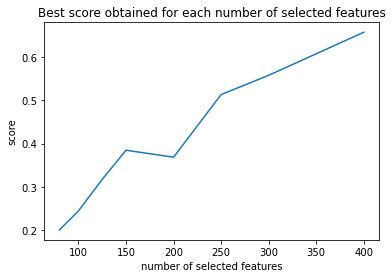

In [49]:
N = np.array([80,100,125,150,200,250,300,400])
best_subset, best_score = DISR(y, DO, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [50]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

400
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.45454545454545453, 0.9972660357518401, 0.6578947368421053, 0.9937133277451802, 0.34210526315789475, 0.5454545454545454)


# Fisher's score

In [83]:
N = np.arange(1000,1101,1)
print(N)

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100]


[   4    5    6 ... 4003 4015 4016] 0.92


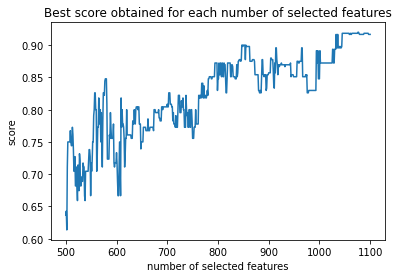

In [93]:
#N = np.array([800,900,950,1000,1025,1050,1075,1100,])
N = np.arange(500,1101,1)
best_subset, best_score = fishers_score(y, DO, FamiliesClusters,compute_precision,True,N, plot=True)

print(best_subset, best_score)

In [94]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)

pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1076
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8214285714285714, 0.9989218328840971, 0.92, 0.9973089343379978, 0.08, 0.17857142857142858)


# Laplacian score

[   0    2    6 ... 4017 4019 4020] 1.0


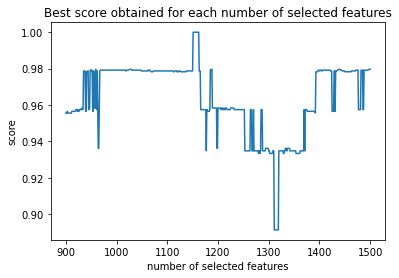

In [121]:
N = np.arange(900,1501,1)
best_subset, best_score = laplacian_score(y, DO, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [122]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1151
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8571428571428571, 1.0, 1.0, 0.9979550102249489, 0.0, 0.14285714285714285)


# ReliefF algorithm

[   0    4    5    7   19   22   28   32   34   72   78   79   80   91
   96   99  126  128  135  138  139  145  152  160  164  165  167  181
  184  190  244  266  268  275  286  291  294  295  304  308  313  316
  353  359  365  384  388  390  394  405  408  409  411  420  422  429
  445  463  465  469  485  490  494  497  513  518  523  527  536  537
  563  564  573  583  587  593  601  602  612  632  641  653  655  668
  679  686  689  690  701  704  719  725  731  733  747  758  771  780
  786  792  804  808  821  824  831  840  848  849  853  861  863  878
  886  889  898  918  923  933  953  968  975  990 1000 1005 1009 1014
 1016 1028 1045 1073 1075 1076 1082 1090 1100 1103 1104 1108 1122 1127
 1140 1158 1166 1172 1182 1207 1228 1247 1262 1264 1270 1296 1301 1302
 1329 1337 1339 1341 1342 1353 1370 1372 1376 1379 1441 1449 1460 1473
 1496 1499 1504 1511 1516 1522 1525 1535 1539 1544 1556 1576 1582 1596
 1598 1600 1603 1611 1616 1617 1625 1639 1668 1670 1677 1685 1689 1690
 1692 

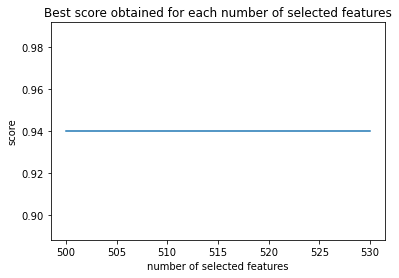

In [28]:
#N = np.array([550,600,650,700,750,800])
N = np.arange(500,531,2)

best_subset, best_score = reliefF(y, DO, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [29]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8392857142857143, 0.9991913746630727, 0.94, 0.9975780409041981, 0.06, 0.16071428571428573)


# Fast Correlation Based Filter algorithm (FCBF)

[   4    8    9   20   23   39   42   59   64   65   66  108  115  118
  129  134  142  145  146  150  156  162  164  165  173  174  179  180
  185  186  187  191  196  201  212  217  218  223  227  230  233  242
  245  248  250  253  257  259  268  271  272  287  295  297  306  311
  313  314  321  323  326  341  349  353  355  356  357  362  363  370
  378  385  392  404  405  409  418  426  427  432  433  437  440  441
  448  461  471  472  473  483  498  501  504  507  509  510  515  517
  526  527  530  534  537  539  541  543  546  548  549  555  561  565
  578  583  591  608  609  611  627  634  647  653  658  662  664  666
  673  674  678  679  682  683  684  697  698  701  706  708  710  718
  726  731  739  755  758  761  769  771  772  776  785  787  788  798
  800  805  816  817  826  839  841  859  867  873  879  889  895  898
  910  924  929  937  942  950  955  968  971  972  973  981  983  987
  988  989  997 1006 1007 1012 1015 1023 1025 1026 1035 1037 1039 1043
 1051 

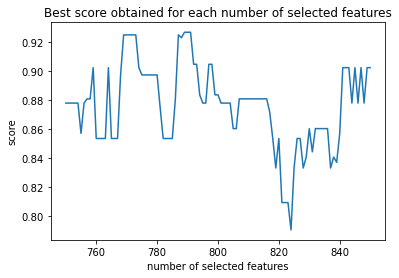

In [67]:
N = np.arange(750,851,1)
best_subset, best_score = FCBF(y, DO, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [68]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

789
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6785714285714286, 0.9993362831858407, 0.926829268292683, 0.9960308710033076, 0.07317073170731707, 0.32142857142857145)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\Imane\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 112. Number of blocks 5.6 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M s

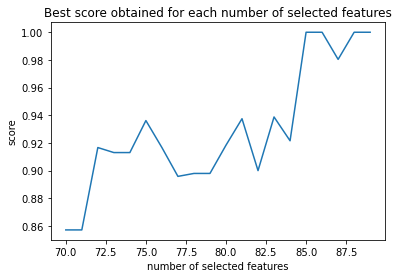

In [138]:
N = np.arange(70,90,1)
best_subset, best_score = HsicLasso(y, DO, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)    

In [139]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

85
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9285714285714286, 1.0, 1.0, 0.9988610478359908, 0.0, 0.07142857142857142)


# Wrapper methods

# Stochastic optimization of features selection 

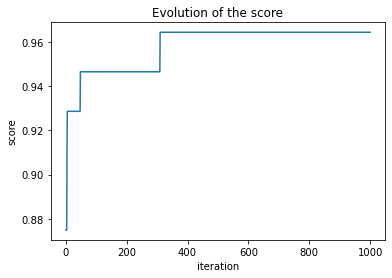

0.9642857142857143


In [28]:
best_subset, best_score  = hillclimbing(y, DO, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [29]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1993
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9642857142857143, 1.0, 1.0, 0.9993939393939394, 0.0, 0.03571428571428571)


# Stimulated annealing

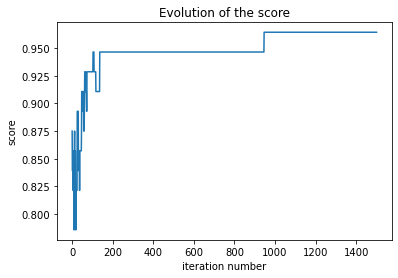

0.9642857142857143


In [32]:
best_subset, best_score  = stimulated_annealing(y, DO, FamiliesClusters, compute_sensitivity,True, 1500, 0.1, 1, True)
print(best_score)

In [33]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1995
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9642857142857143, 1.0, 1.0, 0.9993939393939394, 0.0, 0.03571428571428571)


# Genetic feature selection algorithm

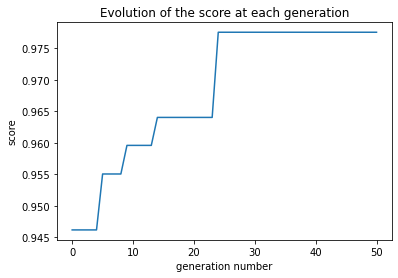

0.9775757575757578


In [37]:
best_subset, best_score  = genetic_fs(y,DO,FamiliesClusters,compute_sensitivity,True, 500, 0.5, 0.2, 50, 3, True)
print(best_score)

In [39]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1719
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9821428571428571, 1.0, 1.0, 0.9996866186148543, 0.0, 0.017857142857142856)


# Hybrid methods

# Mutual information and stimulated annealing

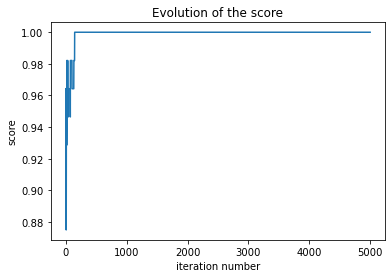

[   9   93  145  230  347  381  401  436  638  639  640  685  717  733
  872  953 1108 1198 1247 1302 1431 1443 1648 1749 1812 1891 2011 2042
 2088 2229 2277 2412 2457 2488 2633 2712 2750 2842 2843 2986 3007 3012
 3214 3633 3840 3874 3901 3922] 1.0


In [17]:
DO_best_subset, best_score = MI_stimulated_annealing(y,DO, FamiliesClusters, compute_sensitivity,True, np.array([100]), 3, 5000, 0.05, 1, True)
print(DO_best_subset, best_score)

In [22]:
print(len(DO_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO[:, DO_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

48
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


# Mutual information and genetic feature selection

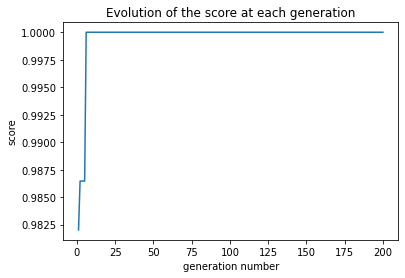

[  34   49   62   93  109  169  301  347  430  497  528  550  582  639
  759  936  937 1226 1231 1249 1329 1380 1419 1698 1741 1864 2219 2243
 2274 2412 2749 2842 2871 3007 3070 3143 3214 3226 3370 3469 3508 3705
 3840 3955] 1.0


In [26]:
best_subset, best_score = MI_genetic_fs(y,DO, FamiliesClusters, compute_sensitivity,True, np.array([300]), 3,  300, 0.5, 0.2, 200, 3, True)
print(best_subset, best_score)

In [27]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

44
sensitivity, specificity, precision, NPV, FDR, FNR =  (1.0, 1.0, 1.0, 1.0, 0.0, 0.0)


In [21]:
DO_best = get_best_genes_names(DO_best_subset, '../data/processed_data/DOgenes_interest.csv' ,'../data/optimized_subsets/DOgenes_best.csv')